In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("saved_model/dataset2/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.duplicated().sum()

0

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.drop(labels=['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
categorical_cols = data.select_dtypes(include= 'object').columns
numerical_cols = data.select_dtypes(exclude= 'object').columns

print("categorical column: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

categorical column:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:

data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
categorical_cols=data.select_dtypes(include='object').columns
numerical_cols=data.select_dtypes(exclude='object').columns
print("categorical_column:",categorical_cols)
print("numerical_column:",numerical_cols)

categorical_column: Index(['Geography', 'Gender'], dtype='object')
numerical_column: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


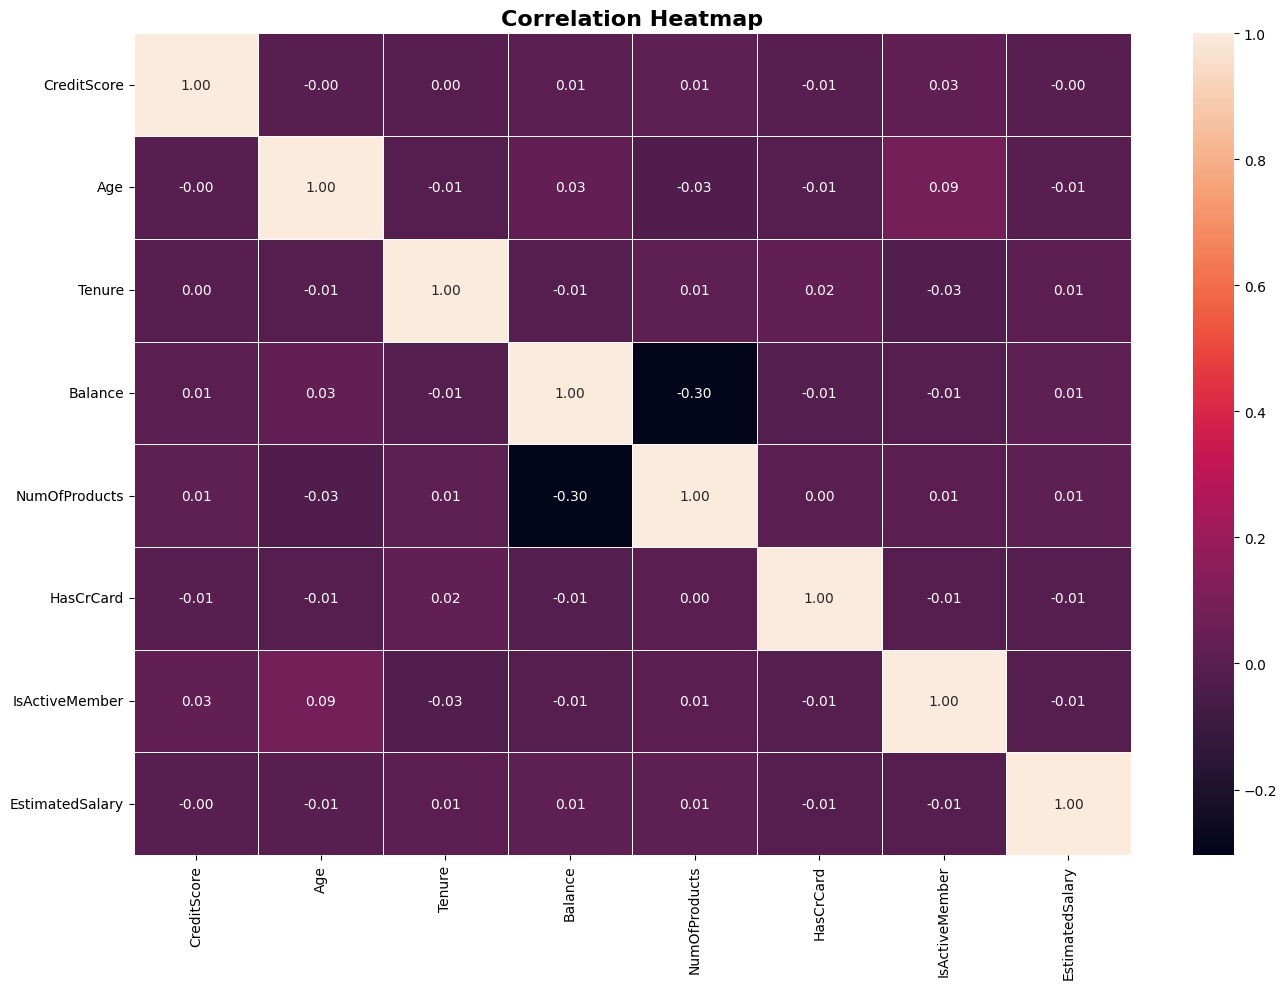

In [14]:
plt.figure(figsize=(14, 10))

# Calculate correlation between numerical features
# Correlation shows how strongly two variables are related
corr_matrix = data[numerical_cols].corr()

# Draw heatmap to visualize correlations
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values inside cells
    fmt=".2f",         # Display values upto 2 decimal places
    linewidths=0.5     # Add lines between cells for clarity
)

# Add title to explain what the plot represents
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")

# Adjust spacing so nothing overlaps
plt.tight_layout()

# Display the heatmap
plt.show()

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
X = data.drop('EstimatedSalary', axis=1)
y = data['EstimatedSalary']

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1


In [18]:
categorical_cols = X.select_dtypes(include= 'object').columns
numerical_cols = X.select_dtypes(exclude= 'object').columns

print("categorical column: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

categorical column:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember'],
      dtype='object')


In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Importing necessary libraries for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
gender_cat = ['Female', 'Male']
geo_cat = ['France', 'Spain', 'Germany']

In [21]:
# Creating pipelines for numerical and categorical features
# Pipeline for numerical features
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
               # Standardize numerical data
               # Helps the models learn faster and better

# Pipeline for categorical features
cat_pipeline = Pipeline(steps=[('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))])
               # Convert categorical values into numbers

# Combine numerical and categorical pipelines

preprocessor = ColumnTransformer(
                    [("num_pipeline", num_pipeline, numerical_cols),      # Apply numerical pipeline to numerical columns
                     ("cat_pipeline", cat_pipeline, categorical_cols)]    # Apply categorical pipeline to categorical columns
                )

In [22]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Applying the preprocessing pipelines to the training and testing data
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [24]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,0.0,1.0


In [25]:
import pickle
with open("saved_model/preprocessor.pkl","wb")as f:
    pickle.dump(preprocessor,f)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

ModuleNotFoundError: No module named 'tensorflow.python.distribute.load_context'

In [ ]:
X_train.shape[1]

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model2.summary()

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
early_stopping_callback=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Step 0: Load dataset, preprocessing, split
# X_train, X_test, y_train, y_test are ready

# Step 1: Convert labels to 0/1 if needed
y_train = np.array([1 if v=='Yes' else 0 for v in y_train]).reshape(-1,)
y_test  = np.array([1 if v=='Yes' else 0 for v in y_test]).reshape(-1,)

# Step 1b: Check labels (exact place for your Step 1)
import numpy as np
print("Train labels unique:", np.unique(y_train, return_counts=True))
print("Test labels unique:", np.unique(y_test, return_counts=True))


# Step 2: Define model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import tensorflow as tf

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


In [ ]:
import numpy as np

# Check number of samples per class
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Use the actual classes in y_train
unique_classes = np.unique(y_train)
weights = compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=y_train
)
class_weight = dict(zip(unique_classes, weights))
print(class_weight)


In [ ]:
history1 = model2.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)